<a href="https://colab.research.google.com/github/fianadew/time-series/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
df=pd.read_csv('/content/drive/My Drive/Monthly_CO2_Concentrations.csv')

In [4]:
df.isnull().sum()
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

CO2      0
Year     0
Month    0
dtype: int64

In [6]:
df['Year'] = df['Year'].astype('int')
df['Month'] = df['Month'].astype('int')

In [7]:
#menggabungkan kolom year dan month menjadi satu waktu
df.index = df['Year'].astype(str)+'-'+df['Month'].astype(str)
df.head()

,CO2,Year,Month
1974-5,333.13,1974,5
1974-6,332.09,1974,6
1974-7,331.10,1974,7
1974-8,329.14,1974,8
1974-9,327.36,1974,9


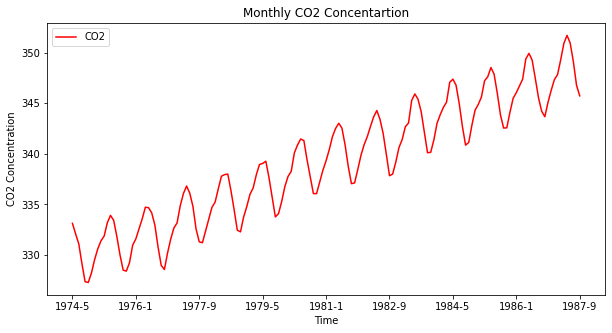

In [8]:
plt.figure(figsize=(10,5))
df['CO2'].plot(c='red')
plt.title('Monthly CO2 Concentartion')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.legend()
plt.show()

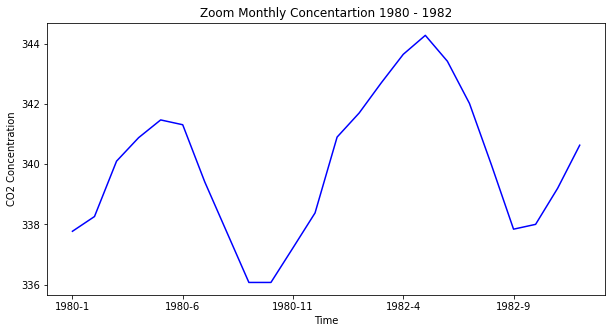

In [9]:
#zoom in 1980 sampai 1981
plt.figure(figsize=(10,5))
df['CO2'].loc[(df['Year']==1980) | (df['Year']==1982)].plot(color='b')
plt.title('Zoom Monthly Concentartion 1980 - 1982')
plt.xlabel('Time')
plt.ylabel('CO2 Concentration')
plt.show()

In [10]:
from sklearn.linear_model import LinearRegression
trend = LinearRegression(normalize=True, fit_intercept=True)
fit=trend.fit(np.arange(df.shape[0]).reshape((-1,1)), df['CO2'])
print("Tred Model Coefficient ={} and Intercept={}".format(trend.coef_[0], trend.intercept_))

Tred Model Coefficient =0.12099301242236027 and Intercept=329.45310559006214


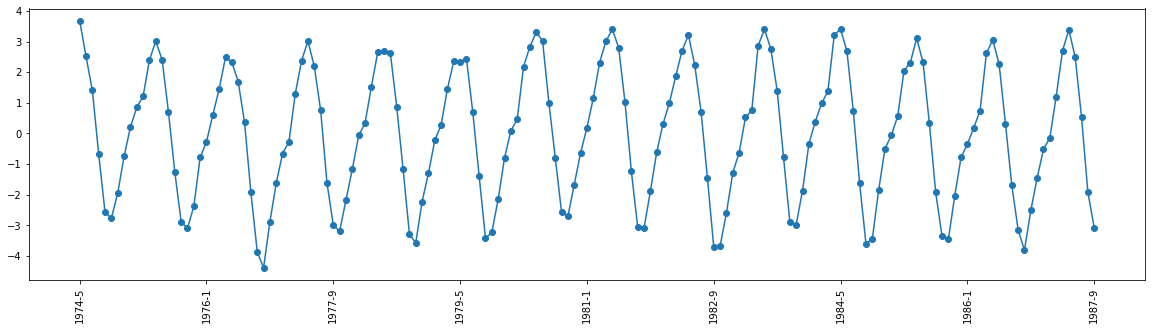

In [11]:
#Kita ga bisa ngeplot antara y observer dengan residuals karena mereka berelasi sehingg memberikan gambaran yang salah
#residuals merupakan pengurangan dari actual values dengan predicted values
#If you have a negative value for a residual it means the actual value was LESS than the predicted value. Under the line, you OVER-predicted, so you have a negative residual
# If you have a positive value for residual, it means the actual value was MORE than the predicted value. Above the line, you UNDER-predicted, so you have a positive residual
#If there is a residual error of zero it means your prediction was exactly correc
#asumsi dari nilai residual seharusnya dalah data terdistribusi normal, nilai variansi x nya sama besar dan independent
df['residual'] = np.array(df['CO2']) - trend.predict(np.arange(df.shape[0]).reshape(-1,1))
plt.figure(figsize=(20,5))
df['residual'].plot()
plt.scatter(df.index, df['residual'])
plt.xticks(rotation=90)
plt.show()

In [12]:
df['residual'].sum()

-3.240074875066057e-12

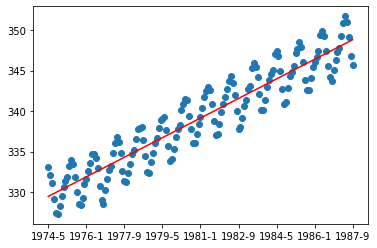

In [13]:
predict = trend.predict(np.arange(df.shape[0]).reshape(-1,1))
pd.Series(data=predict, index=df.index).plot(c='red')
plt.scatter(df.index, df['CO2'])
plt.show()